In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
data = pd.read_csv('./data/haberman.csv',names=['Age','Operation_year','Nb_pos_detected','Surv'])
data.head(5)


,Age,Operation_year,Nb_pos_detected,Surv
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<AxesSubplot:xlabel='timeline'>

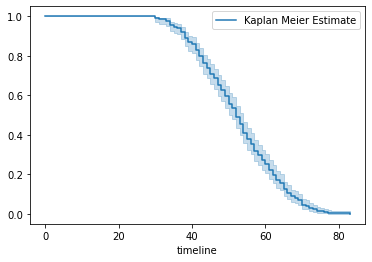

In [7]:
T = data.Age
E = data.Surv

kmf = KaplanMeierFitter(label='Kaplan Meier Estimate')
kmf.fit(T,E)

kmf.plot(ci_show=True)

<AxesSubplot:xlabel='timeline'>

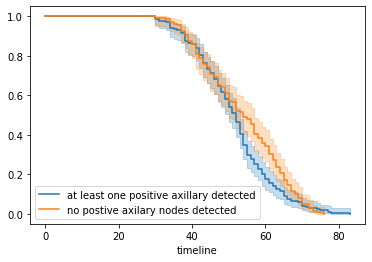

In [10]:
kmf_2 = KaplanMeierFitter()
groups = data['Nb_pos_detected']

i1 = (groups>=1)
i2 = (groups <1)

kmf_2.fit(T[i1],E[i1],label='at least one positive axillary detected')
a1 = kmf_2.plot()

kmf_2.fit(T[i2],E[i2],label='no postive axilary nodes detected')
kmf_2.plot(ax=a1)

In [11]:
cph = CoxPHFitter()

cph.fit(data,'Age',event_col='Surv')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 306 total observations, 0 right-censored observations>
             duration col = 'Age'
                event col = 'Surv'
      baseline estimation = breslow
   number of observations = 306
number of events observed = 306
   partial log-likelihood = -1446.95
         time fit was run = 2022-10-21 01:50:13 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
Operation_year   -0.02       0.98       0.02            -0.06             0.01                 0.94                 1.01
Nb_pos_detected   0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03

                  cmp to     z    p   -log2(p)
covariate                                     
Operation_year      0.00 -1.39 0.16       2.61
Nb_pos_detected     0.00  1.70 0.09       3.47
---
Concordance = 0.53
Partial AIC = 2897.90
log-likelihood ratio test = 4.50 on 2 df
-log2(p) of ll-ratio test = 3.25

<AxesSubplot:xlabel='log(HR) (95% CI)'>

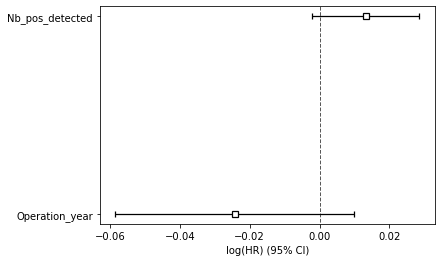

In [12]:
cph.plot()

In [13]:
pataients = [4,125,211]
rows_selected = data.iloc[pataients,1:3]
rows_selected

,Operation_year,Nb_pos_detected
4,65,4
125,64,0
211,67,0


<AxesSubplot:>

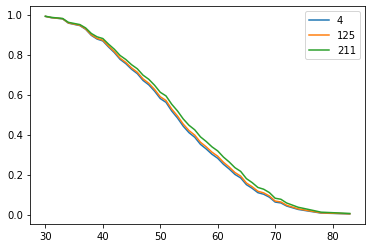

In [14]:
cph.predict_survival_function(rows_selected).plot()